In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.datasets import make_circles
import tensorflow as tf

import os
import random

from tensorflow.keras.layers import InputLayer, Dense

# Description of the data attributes is as below:

- Area(total): Total area of the plot.
- Trooms: Total Number of rooms in the house
- Nbedrooms: Number of bedroom in the house
- Nbwashrooms: Number of washroom attached with bedroom
- Twashrooms: total number of washroom in the house.
- Roof: Does the house has roof(yes or no)
- Roof(Area): Total area of the terrace
- Lawn(Area): Area of the lawn including garden and parking
- Nfloor: Number of floors in the house
- API: Air purity index api is in percentage for example if api is 85 it means its 85% of the standard api for the city.
- ANB: Amenities near by amenities like hospital, park , multiplex , malls etc within 2 miles.
- Expected price: price expected by seller.
- Grade: Grade provided by company that depends on the condition and other features mentioned in the data. *(Note A is best garde and E is worst.)*

 Evaluation: The metric of evaluation for this prediction problem is Accuracy.

In [142]:
old_training_df = pd.read_csv("TRAINING_.csv")
old_training_df.sample(5)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
3547,3548,329,8.0,3.0,3.0,5.0,yes,84.0,92.0,2,59.0,4,C,4237$
6085,6086,311,9.0,6.0,5.0,7.0,NaN,NaN,89.0,8,70.0,3,A,4473$
3094,3095,294,6.0,5.0,5.0,6.0,NO,0.0,109.0,5,89.0,5,D,3543$
2232,2233,301,9.0,8.0,6.0,8.0,YES,96.0,84.0,8,88.0,3,A,4954$
3118,3119,308,6.0,4.0,3.0,4.0,yes,89.0,103.0,1,84.0,1,D,3566$


In [143]:
old_training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


* removing "$" sign from "EXPECTED" column

In [144]:
old_training_df["EXPECTED"] = old_training_df["EXPECTED"].str.replace("$","").astype("float")

In [145]:
training_df = old_training_df.drop(columns=(["roof", "Roof(Area)", "Grade", "id"]))

## Handling Missing Data

In [146]:
training_df.isnull().sum()

Area(total)    0
Troom          2
Nbedrooms      3
Nbwashrooms    2
Twashrooms     1
Lawn(Area)     2
Nfloors        0
API            1
ANB            0
EXPECTED       0
dtype: int64

* fill missing values using mean,mode

In [147]:
#mode
mode_col = ["Troom","Nbedrooms","Nbwashrooms","Twashrooms"]

#mean
mean_col= ["Lawn(Area)", "API"]

In [148]:
from sklearn.impute import SimpleImputer


si = SimpleImputer(strategy = "most_frequent")

training_df[mode_col] = pd.DataFrame(si.fit_transform(training_df[mode_col]), index = training_df.index, columns = mode_col)


si = SimpleImputer(strategy = "mean")
training_df[mean_col] = pd.DataFrame(si.fit_transform(training_df[mean_col]), index = training_df.index, columns = mean_col)

In [149]:
training_df.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
dtype: int64

In [150]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  7000 non-null   int64  
 1   Troom        7000 non-null   float64
 2   Nbedrooms    7000 non-null   float64
 3   Nbwashrooms  7000 non-null   float64
 4   Twashrooms   7000 non-null   float64
 5   Lawn(Area)   7000 non-null   float64
 6   Nfloors      7000 non-null   int64  
 7   API          7000 non-null   float64
 8   ANB          7000 non-null   int64  
 9   EXPECTED     7000 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 547.0 KB


* ------- all missing values are handled in training_df ( 9 - columns )----------------

## scaling

In [151]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_training_scale = pd.DataFrame(ss.fit_transform(training_df), columns=training_df.columns, index=training_df.index)

In [152]:
df_training_scale

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED
0,-0.984255,0.695196,-1.810562,-1.881612,-1.657462,-1.181860,-1.370481,-1.348076,0.297170,-0.423898
1,0.913637,-0.713102,1.214099,1.876064,1.655947,-0.589151,1.360183,1.520941,-1.467196,0.849083
2,-1.519558,0.695196,-0.600698,-0.629053,-0.994780,-1.012515,-1.916614,0.761495,0.297170,0.327403
3,0.135015,-1.417250,-0.600698,-1.255332,-0.994780,0.088230,0.267917,0.592730,-1.467196,-1.157071
4,-1.470894,1.399345,0.004235,-0.629053,-0.332098,0.596266,-0.278216,1.183409,-0.290952,1.020291
...,...,...,...,...,...,...,...,...,...,...
6995,-0.935591,0.695196,-1.810562,-1.881612,-1.657462,-1.012515,-1.916614,-0.504247,0.885291,-0.643447
6996,0.767645,-1.417250,-1.205630,-1.255332,-0.994780,-1.520551,-0.278216,-0.251099,0.297170,-1.404819
6997,-0.935591,-0.713102,-0.600698,-1.255332,-0.994780,-0.843169,-0.278216,1.436558,0.297170,-0.417856
6998,0.621653,0.695196,1.214099,1.249785,0.993265,0.426921,-0.278216,0.423964,-1.467196,0.909510


## k-mean

In [153]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')

kmeans.fit(df_training_scale)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [154]:
training_df["cluster"] = kmeans.labels_

In [155]:
training_df["Roof(Area)"] = old_training_df["Roof(Area)"]

In [156]:
training_df.groupby(["cluster"])["Roof(Area)"].mean()

cluster
0    44.518554
1    46.198919
2    44.628081
3    49.198255
4    51.573296
Name: Roof(Area), dtype: float64

In [157]:
zero = training_df["cluster"]==0
training_df.loc[zero] = training_df.loc[zero].fillna(value= 44.518554)


one = training_df["cluster"]==1
training_df.loc[one] = training_df.loc[one].fillna(value= 46.198919)


two = training_df["cluster"]==2
training_df.loc[two] = training_df.loc[two].fillna(value= 44.628081)


three = training_df["cluster"]==3
training_df.loc[three] = training_df.loc[three].fillna(value= 49.198255)


four = training_df["cluster"]==4
training_df.loc[four] = training_df.loc[four].fillna(value= 51.573296)

In [158]:
training_df.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
cluster        0
Roof(Area)     0
dtype: int64

* ---------------------- all missing values are handled in training_df ( 12 - columns, drop= [ "id" , "roof" ] ) --------------------------------

## training_df

In [159]:
training_df.drop(columns=["cluster"], inplace=True)

In [160]:
training_df = pd.concat([training_df,old_training_df["Grade"]],axis=1)

In [161]:
training_df["Grade"] = training_df["Grade"].replace({"A":4, "B":3, "C":2, "D":1, "E":0})

In [162]:
training_df

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED,Roof(Area),Grade
0,305,8.0,2.0,1.0,3.0,76.0,2,63.0,4,3826.0,0.000000,1
1,344,6.0,7.0,7.0,8.0,83.0,7,97.0,1,4458.0,0.000000,3
2,294,8.0,4.0,3.0,4.0,78.0,1,88.0,4,4199.0,97.000000,2
3,328,5.0,4.0,2.0,4.0,91.0,5,86.0,1,3462.0,0.000000,1
4,295,9.0,5.0,3.0,5.0,97.0,4,93.0,3,4543.0,49.198255,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,306,8.0,2.0,1.0,3.0,78.0,1,73.0,5,3717.0,44.628081,1
6996,341,5.0,3.0,2.0,4.0,72.0,4,76.0,4,3339.0,100.000000,1
6997,306,6.0,4.0,2.0,4.0,80.0,4,96.0,4,3829.0,83.000000,1
6998,338,8.0,7.0,6.0,7.0,95.0,4,84.0,1,4488.0,0.000000,3


## x,y

In [163]:
X = training_df.drop(columns=["Grade"])
y = training_df["Grade"]

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5250, 11)
(1750, 11)


## scale

In [165]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scale = pd.DataFrame(ss.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scale = pd.DataFrame(ss.transform(X_test), index=X_test.index, columns=X_test.columns)


## <center>~ Applying Models ~


## Applying ANN model 
* ann is gives good accuracy compaired to other model like - [ LogisticRegression, DecisionTreeClassifier, RandomForestClassifier,  GradientBoostingClassifier, XGBClassifier]

In [166]:
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [167]:
def plot_curve(history):
    history_df = pd.DataFrame(history.history)

    fig, ax = plt.subplots(1,2, figsize = (10,4))

    sns.lineplot(data = history_df,x = history_df.index+1, y = "loss", label = "training_loss", ax = ax[0])
    sns.lineplot(data = history_df,x = history_df.index+1, y = "val_loss", label = "validation_loss",ax = ax[0])


    sns.lineplot(data = history_df,x = history_df.index+1, y = "accuracy", label = "training_accuracy", ax = ax[1])
    sns.lineplot(data = history_df,x = history_df.index+1, y = "val_accuracy", label = "validation_accuracy", ax = ax[1])

    fig.suptitle("loss & accuracy curve plot")
    plt.tight_layout()
    plt.show()

## 4 

In [168]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense,Dropout

set_seed(42)

# model creation
ann4 = tf.keras.Sequential([
    InputLayer(input_shape=(11,)),

    Dense(150, 'relu'),
    Dropout(0.2),

    Dense(100, 'relu'),
    Dense(50, 'relu'),
    Dropout(0.2),

    Dense(5, 'softmax')])

# model compile
ann4.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# model fit
result4 = ann4.fit(X_train_scale, y_train, epochs=40, batch_size=12, validation_data=(X_test_scale, y_test))

Random seed set as 42
Epoch 1/40
430/438 [============================>.] - ETA: 0s - loss: 0.9674 - accuracy: 0.6692

438/438 [==============================] - 4s 5ms/step - loss: 0.9613 - accuracy: 0.6707 - val_loss: 0.5592 - val_accuracy: 0.8034
Epoch 2/40
438/438 [==============================] - 2s 4ms/step - loss: 0.5313 - accuracy: 0.7981 - val_loss: 0.4092 - val_accuracy: 0.8514
Epoch 3/40
438/438 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8265 - val_loss: 0.3467 - val_accuracy: 0.8686
Epoch 4/40
438/438 [==============================] - 2s 4ms/step - loss: 0.3864 - accuracy: 0.8514 - val_loss: 0.3090 - val_accuracy: 0.8846
Epoch 5/40
438/438 [==============================] - 2s 4ms/step - loss: 0.3483 - accuracy: 0.8682 - val_loss: 0.3007 - val_accuracy: 0.8886
Epoch 6/40
438/438 [==============================] - 2s 4ms/step - loss: 0.3100 - accuracy: 0.8808 - val_loss: 0.2600 - val_accuracy: 0.8994
Epoch 7/40
438/438 [==============================] - 2s 4ms/step - loss: 0.2947 - accuracy: 0.8853 - val_loss: 0.2507 - val_accuracy: 0.9046
Epoch 8/40
438/43

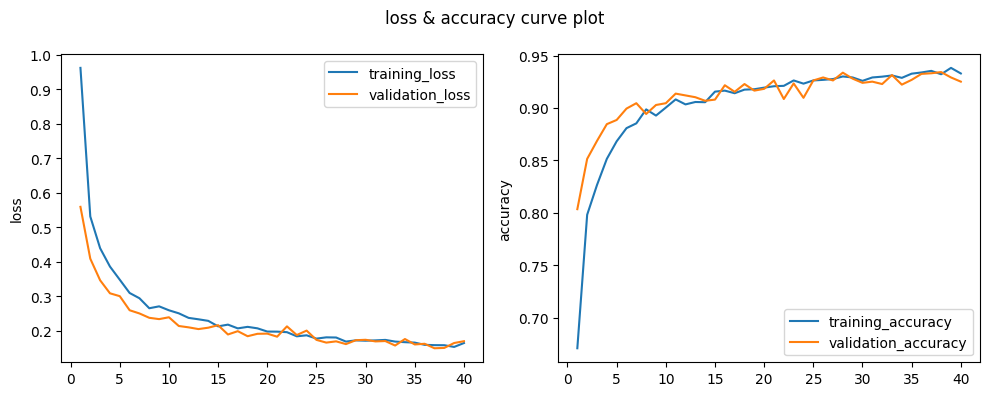

In [169]:
plot_curve(result4)

* model

In [170]:
ann4.evaluate(X_test_scale, y_test)


 1/55 [..............................] - ETA: 5s - loss: 0.2691 - accuracy: 0.8438

55/55 [==============================] - 0s 4ms/step - loss: 0.1704 - accuracy: 0.9251


[0.17041394114494324, 0.9251428842544556]

In [171]:
y_pred_ann_4 = ann4.predict(X_test_scale)


55/55 [==============================] - 0s 2ms/step


In [172]:
y_pred_4 = np.argmax(y_pred_ann_4, axis= 1)


In [173]:
print(classification_report(y_test, y_pred_4))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.95      0.94      0.94       514
           2       0.93      0.95      0.94       747
           3       0.94      0.86      0.90       371
           4       0.79      0.99      0.88       112

    accuracy                           0.93      1750
   macro avg       0.72      0.75      0.73      1750
weighted avg       0.92      0.93      0.92      1750



c:\Users\Manish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Manish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Manish Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [174]:
ann4.save("ann_model_4")


INFO:tensorflow:Assets written to: ann_model_4\assets


INFO:tensorflow:Assets written to: ann_model_4\assets


In [175]:
load_model_4 = tf.keras.models.load_model("ann_model_4")


In [176]:
pd.Series(np.argmax(load_model_4.predict(X_test_scale),axis=1)).value_counts()

55/55 [==============================] - 0s 2ms/step


2    762
1    507
3    341
4    140
Name: count, dtype: int64

# <center> Working on test data

In [177]:
test_df = pd.read_csv('TEST_.csv')
test_df.sample(5)

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
2129,2130,326,8.0,5.0,6.0,7,YES,91.0,103.0,7,93.0,5,4812$
1278,1279,331,6.0,6.0,4.0,6,YES,110.0,90.0,4,65.0,4,3709$
3153,3154,328,5.0,8.0,6.0,8,no,0.0,105.0,5,84.0,2,4346$
2417,2418,296,9.0,7.0,5.0,7,no,0.0,105.0,7,97.0,6,4709$
2179,2180,348,7.0,7.0,4.0,6,no,0.0,97.0,5,77.0,3,4250$


In [178]:
test_df.shape

(3299, 13)

In [179]:
test_df.isnull().sum()[test_df.isnull().sum()>0]

Troom            1
Nbedrooms        1
Nbwashrooms      1
roof           653
Roof(Area)     653
Lawn(Area)       1
API              1
dtype: int64

In [180]:
test_df['EXPECTED'] = test_df['EXPECTED'].str.strip('$').astype(float)

In [181]:
test_df.drop(columns=['id'], inplace=True)

In [182]:
new_test_df = test_df.drop(columns = ['roof', 'Roof(Area)'])
new_test_df.head(7)

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED
0,348,9.0,5.0,3.0,5,84.0,5,91.0,6,4422.0
1,311,6.0,5.0,5.0,6,86.0,6,83.0,4,3432.0
2,342,5.0,6.0,6.0,7,85.0,4,95.0,5,4066.0
3,329,7.0,7.0,4.0,6,105.0,5,97.0,6,4322.0
4,307,6.0,2.0,3.0,4,76.0,2,64.0,4,3031.0
5,297,6.0,6.0,4.0,6,103.0,6,73.0,6,4223.0
6,292,9.0,7.0,6.0,7,101.0,5,88.0,5,4993.0


In [183]:
new_test_df.isnull().sum()[new_test_df.isnull().sum() > 0]

Troom          1
Nbedrooms      1
Nbwashrooms    1
Lawn(Area)     1
API            1
dtype: int64

In [184]:
mode_cols = ['Troom', 'Nbedrooms', 'Nbwashrooms']
mean_cols = ['Lawn(Area)', 'API']

new_test_df[mode_cols] = new_test_df[mode_cols].fillna(test_df[mode_cols].mode().iloc[0])
new_test_df[mean_cols] = new_test_df[mean_cols].fillna(test_df[mean_cols].mean())

In [185]:
scaler = StandardScaler()
new_test_df_scale = pd.DataFrame(scaler.fit_transform(new_test_df), index = new_test_df.index, columns=new_test_df.columns)
new_test_df_scale.head(2)

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1.154616,1.421814,-0.000933,-0.650541,-0.341896,-0.517482,0.276844,1.004131,1.477486,0.815526
1,-0.665650,-0.691688,-0.000933,0.642311,0.339623,-0.348648,0.838533,0.326682,0.298570,-1.222186


In [186]:
km = KMeans(n_clusters= 5, random_state=42, n_init = 10)
km.fit(new_test_df_scale)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [187]:
new_test_df['K_cluster'] = km.labels_

In [188]:
new_test_df['Roof(Area)'] = test_df['Roof(Area)']

In [189]:
new_test_df.groupby(by='K_cluster')['Roof(Area)'].mean()

K_cluster
0    49.977186
1    46.112903
2    46.326718
3    46.603912
4    47.479920
Name: Roof(Area), dtype: float64

In [190]:
cluster_median_mapping = {
    0: 49.977186,
    1: 46.112903,
    2: 46.326718,
    3: 46.603912,
    4: 47.479920
}

# Fill missing values with the cluster mean
new_test_df['Roof(Area)'].fillna(new_test_df['K_cluster'].map(cluster_median_mapping), inplace=True)

In [191]:
new_test_df.drop(columns=['K_cluster'], inplace=True)


In [192]:
## Standardizing
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
test_std = pd.DataFrame(scale.fit_transform(new_test_df), index=new_test_df.index, columns=new_test_df.columns)

In [193]:
test_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  3299 non-null   float64
 1   Troom        3299 non-null   float64
 2   Nbedrooms    3299 non-null   float64
 3   Nbwashrooms  3299 non-null   float64
 4   Twashrooms   3299 non-null   float64
 5   Lawn(Area)   3299 non-null   float64
 6   Nfloors      3299 non-null   float64
 7   API          3299 non-null   float64
 8   ANB          3299 non-null   float64
 9   EXPECTED     3299 non-null   float64
 10  Roof(Area)   3299 non-null   float64
dtypes: float64(11)
memory usage: 283.6 KB


## load model

In [194]:
load_model = tf.keras.models.load_model('ann_model_4')

In [195]:
pd.Series(np.argmax(load_model.predict(test_std), axis=1)).value_counts()

104/104 [==============================] - 0s 3ms/step


2    1432
1     983
3     625
4     257
0       2
Name: count, dtype: int64

In [196]:
final_df = pd.DataFrame()

# read test_.csv

In [197]:
test_df = pd.read_csv('TEST_.csv')

In [198]:
final_df['id'] = test_df['id']

In [199]:
final_df["Grade"] = np.argmax(load_model.predict(test_std), axis=1)

104/104 [==============================] - 0s 3ms/step


In [200]:
final_df["Grade"].replace({4:"A", 3:"B", 2:"C", 1:"D", 0:"E"}, inplace=True)

In [201]:
final_df.to_csv('submission_4.csv', index=False)